In [1]:
'''
1. Os dados est„o agrupados por anos, e dentro de cada ano, por meses; os ficheiros tÍm extens„o TXT.
	Exemplo de nome de ficheiro: FEEmmaa.TXT, em que:
        	FEE - nome da estaÁ„o (Leixıes: FLE, Faro:FFA);
		mm  - identificador do mÍs; 
		aa  - identificador do ano; 
    
2. Para cada grupo data-hora (hora,min,dia,mes,ano) s„o apresentados os seguintes par‚metros(-1:cÛdigo erro ou par‚metro inexistente):
	
	2.1) Calculados pelo mÈtodo espectral:
	     Hm0 - altura significativa (m);
	     T02 - perÌodo mÈdio (s);
	     Tp- perÌodo de pico (s);
	     Thtp - direcÁ„o mÈdia associada ao perÌodo de pico (∞);
	     Sprtp - dispers„o no perÌodo de pico (∞);
	     
	 2.2) Calculados pelo mÈtodo directo (zero ascendente):
	      Hs - altura significativa (m); 
	      Hmax - altura m·xima (m);
	      Ths - perÌodo de hs (s) - (mÈdia dos perÌodos correspondentes ‡s ondas que foram utilizadas no c·lculo de Hs);
	      Thmax - PerÌodo correspondente a HMAX;
	      Tz - MÈdia dos perÌodos de zero ascendente;
	      Tmax - PerÌodo m·ximo ocorrido no registo.


Nota: As direcÁıes est„o referidas ao Norte verdadeiro.

3. A localizaÁ„o das estaÁıes È a seguinte: 

Leixıes (atÈ 4 julho 1996):       Lat = 41∫ 12' 12" N; Long = 9∫ 05í 18" W; Prof = 110 metros.
Leixıes (a partir 17 Julho 1996): Lat = 41∫ 19' 00" N; Long = 8∫ 59í 00" W; Prof =  83 metros.
Faro:                             Lat = 36∫ 54' 17" N; Long = 7∫ 53' 54" W; Prof =  93 metros.
'''

'\n1. Os dados est„o agrupados por anos, e dentro de cada ano, por meses; os ficheiros tÍm extens„o TXT.\n\tExemplo de nome de ficheiro: FEEmmaa.TXT, em que:\n        \tFEE - nome da estaÁ„o (Leixıes: FLE, Faro:FFA);\n\t\tmm  - identificador do mÍs; \n\t\taa  - identificador do ano; \n    \n2. Para cada grupo data-hora (hora,min,dia,mes,ano) s„o apresentados os seguintes par‚metros(-1:cÛdigo erro ou par‚metro inexistente):\n\t\n\t2.1) Calculados pelo mÈtodo espectral:\n\t     Hm0 - altura significativa (m);\n\t     T02 - perÌodo mÈdio (s);\n\t     Tp- perÌodo de pico (s);\n\t     Thtp - direcÁ„o mÈdia associada ao perÌodo de pico (∞);\n\t     Sprtp - dispers„o no perÌodo de pico (∞);\n\t     \n\t 2.2) Calculados pelo mÈtodo directo (zero ascendente):\n\t      Hs - altura significativa (m); \n\t      Hmax - altura m·xima (m);\n\t      Ths - perÌodo de hs (s) - (mÈdia dos perÌodos correspondentes ‡s ondas que foram utilizadas no c·lculo de Hs);\n\t      Thmax - PerÌodo correspondente a H

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as mfm

font_path = '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono'
prop = mfm.FontProperties(family='OpenSymbol')

%matplotlib inline
sns.set_style("whitegrid")

In [3]:
#Janeiro 2014
wave_raw_0114 = pd.read_csv('FLE0114.TXT', delim_whitespace=True, header = None)
wave_drop_0114 = wave_raw_0114.drop(columns=[5,6,7,9,10,12,14,15], axis=1)
wave_0114 = wave_drop_0114.rename(columns={0:'hour', 1:'min', 2:'day', 3:'month', 4:'year', 8:'wave_direction(°)', 11:'wave_height(m)', 13:'wave_period(s)', 16:'station'})

#February 2014
wave_raw_0214 = pd.read_csv('FLE0214.TXT', delim_whitespace=True, header = None)
wave_drop_0214 = wave_raw_0214.drop(columns=[5,6,7,9,10,12,14,15], axis=1)
wave_0214 = wave_drop_0214.rename(columns={0:'hour', 1:'min', 2:'day', 3:'month', 4:'year', 8:'wave_direction(°)', 11:'wave_height(m)', 13:'wave_period(s)', 16:'station'})


In [4]:
#convert wave_direction; adding new column
def convert(x):
    if x>=23 and x<68:
        return u"\u2199"
    elif x>=68 and x<113:
        return u"\u2190"
    elif x>=113 and x<158:
        return u"\u2196"
    elif x>=158 and x<203:
        return u"\u2191"
    elif x>=203 and x<248:
        return u"\u2197"
    elif x>=248 and x<293:
        return u"\u2192"
    elif x>=293 and x<338:
        return u"\u2198"
    else:
        return u"\u2193"
    
wave_0114['wave_direction'] = wave_0114['wave_direction(°)'].apply(convert)    
wave_0214['wave_direction'] = wave_0214['wave_direction(°)'].apply(convert)

wave_0114['wave_frequency'] = (1/(wave_0114['wave_period(s)'])*100)
wave_0214['wave_frequency'] = (1/(wave_0214['wave_period(s)'])*100)

wave_0114.head()#['wave_height(m)'].max()
wave_0214.head()

,hour,min,day,month,year,wave_direction(°),wave_height(m),wave_period(s),station,wave_direction,wave_frequency
0,0,0,1,2,2014,320,4.73,9.4,LEIXOES,↘,10.638298
1,3,0,1,2,2014,298,5.69,10.2,LEIXOES,↘,9.803922
2,6,0,1,2,2014,308,5.60,7.8,LEIXOES,↘,12.820513
3,8,0,1,2,2014,314,7.61,9.4,LEIXOES,↘,10.638298
4,8,30,1,2,2014,315,6.59,10.9,LEIXOES,↘,9.174312


In [9]:
#max measure per day

#January 2014
max_0114 = wave_0114.groupby(['day'])['wave_height(m)'].transform(max) == wave_0114['wave_height(m)'] #creates mask
max_wave_0114 = wave_0114[max_0114] #applies mask to dataframe #max measure in that day
#February 2014
max_0214 = wave_0214.groupby(['day'])['wave_height(m)'].transform(max) == wave_0214['wave_height(m)'] #creates mask
max_wave_0214 = wave_0214[max_0214] #applies mask to dataframe #max measure in that day

max_wave_0114.head()

,hour,min,day,month,year,wave_direction(°),wave_height(m),wave_period(s),station,wave_direction,wave_frequency
34,17,0,1,1,2014,301,11.59,14.8,LEIXOES,↘,6.756757
77,14,30,2,1,2014,305,9.47,11.7,LEIXOES,↘,8.547009
137,20,30,3,1,2014,300,11.56,12.5,LEIXOES,↘,8.000000
168,17,30,4,1,2014,285,13.42,13.3,LEIXOES,→,7.518797
181,0,0,5,1,2014,290,10.24,14.1,LEIXOES,→,7.092199


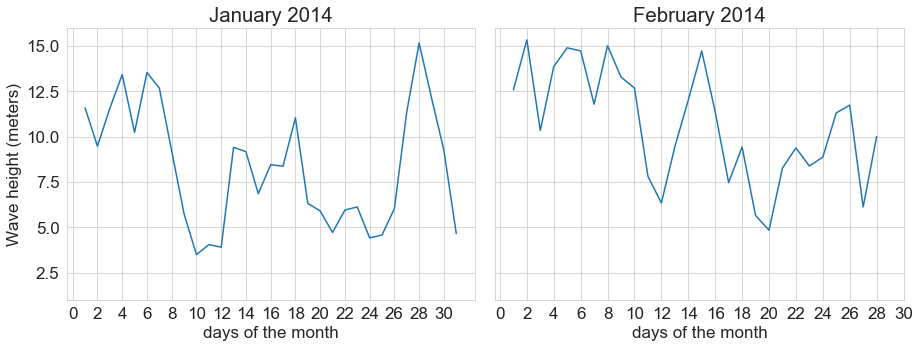

In [6]:
#plotting
plt.rcParams.update({'font.size': 17})
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
f.subplots_adjust(hspace=0.2, wspace=0.05)

sns.lineplot(x="day", y="wave_height(m)", data=max_wave_0114, ax=axes[0]).set_title('January 2014')
#sns.lineplot(x="day", y="wave_frequency", data=max_wave_0114, ax=axes[0]).set_title('January 2014')

sns.lineplot(x="day", y="wave_height(m)", data=max_wave_0214, ax=axes[1]).set_title('February 2014')
#sns.lineplot(x="day", y="wave_frequency", data=max_wave_0214, ax=axes[1]).set_title('January 2014')


for ax in f.get_axes():
    ax.label_outer()
    ax.set_xlabel('days of the month')
    ax.set_ylabel('Wave height (meters)')
    ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
    ax.set_ylim([1,16])

findfont: Font family ['OpenSymbol'] not found. Falling back to DejaVu Sans.


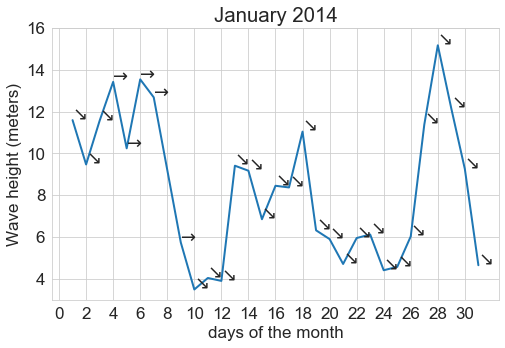

In [7]:
#January 2014

fig, ax = plt.subplots(figsize=(8, 5))

x = max_wave_0114['day']
y = max_wave_0114['wave_height(m)']
line = ax.plot(x, y, lw=2)

directions_0114 = max_wave_0114['wave_direction'].tolist()

for i, txt in enumerate(directions_0114):
    ax.annotate(txt, xy=(x.iloc[i], y.iloc[i]), fontproperties=prop, fontsize=18)

ax.set_xlabel('days of the month')
ax.set_ylabel('Wave height (meters)')
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
ax.set_ylim([3,16])
ax.set_title('January 2014')
    
plt.show()

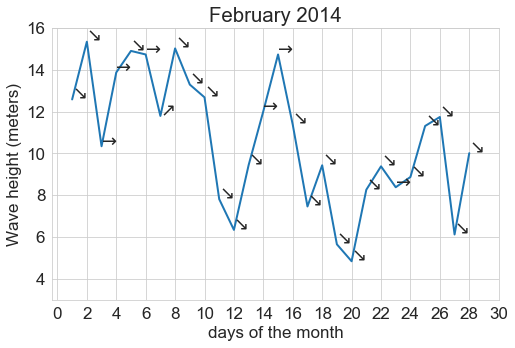

In [8]:
#February 2014

fig, ax = plt.subplots(figsize=(8, 5))

x = max_wave_0214['day']
y = max_wave_0214['wave_height(m)']
line = ax.plot(x, y, lw=2)

directions_0214 = max_wave_0214['wave_direction'].tolist()

for i, txt in enumerate(directions_0214):
    ax.annotate(txt, xy=(x.iloc[i], y.iloc[i]), fontproperties=prop, fontsize=18)

ax.set_xlabel('days of the month')
ax.set_ylabel('Wave height (meters)')
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
ax.set_ylim([3,16])
ax.set_title('February 2014')
    
plt.show()